In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient descent

Let's start by defining the _cost function_, in this case the sum-of-squares error function.

In [2]:
def error_ssq(x , y):
    if len(x) != len(y):
        raise ValueError('Input arrays have different length')
    return sum((xi - yi)**2 for xi,yi in zip(x,y)) / len(x)

In [3]:
def grad_desc(x, y , max_iter=5000, alpha=0.01, tol=0.000001):
    omega = [0.2,0.2]
    intercept = []
    slope = []

    for i in range(max_iter):

        if (np.abs(sum((omega[0] +omega[1]*xi - yi) for xi, yi in zip(x,y))) < tol) and (abs(sum((omega[0] + omega[1]*xi - yi)*xi for xi, yi in zip(x,y))) < tol):
            break

        omega[0] = omega[0] - (alpha/len(x)) * sum((omega[0] + omega[1]*xi - yi) for xi, yi in zip(x,y))
        omega[1] = omega[1] - (alpha/len(x)) * sum((omega[0] + omega[1]*xi - yi)*xi for xi, yi in zip(x,y))

        intercept.append(omega[0])
        slope.append(omega[1])

    print(i + 1)    
    return omega, intercept, slope    


In [4]:
#np.random.seed(3)

def f(x):
    """"This function is the underlying _true_ function from which the data is generated"""
    return 2*x + 1
def simulated_data(sample_size, std, a=0, b=1):
    """ This function generates the random data by adding a normally distributed noise to a given function f in the interval (0,1)"""
    x = np.linspace(a,b, sample_size)
    y = f(x) + np.random.normal(0.0, scale=std, size=len(x))
    return x, y


In [5]:
np.random.seed(3)
X_train, y_train = simulated_data(20,std=0.1)


In [6]:
w, bias_list, weight_list  = grad_desc(x= X_train,y=y_train, alpha=0.1 ,max_iter=100)


100


In [7]:
cf = np.zeros((2,len(bias_list)))
cf[0] = bias_list
cf[1] = weight_list
#print(cf[1,0])

In [8]:
def pred(x, coeff):
    return coeff[0] + coeff[1]*x


In [9]:
cf[:,99]

array([1.28896807, 1.44508504])

In [10]:
yp = np.zeros((len(bias_list), len(X_train)))
for i in range(len(bias_list)):
    yp[i,:] = pred(X_train, cf[:,i])
    #errsq.append(error_ssq(X_train, yp[i,:]))

#print(yp[1,:])  

In [11]:
errsq = []

for k in range(0, len(bias_list)):
    yaux = cf[0,k] + cf[1,k]*X_train
    errsq.append(error_ssq(y_train,yaux)) 

    
errsq = np.array(errsq)

In [12]:
y_pred = pred(X_train, w)
#print(y_pred)

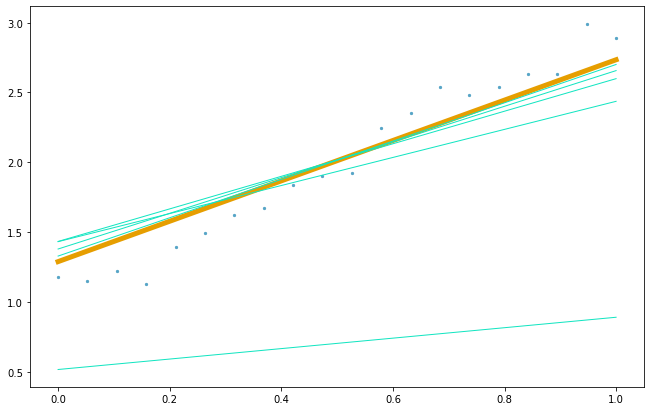

In [13]:
xplot = np.linspace(0, 1, len(X_train))

fig, ax = plt.subplots(figsize=(11,7))

ax.scatter(X_train, y_train, color='#56a5c7',s=5)

ax.plot(X_train, w[0] + w[1]*X_train, color='#e69e00', lw=5 )

for j in range(1, len(bias_list),20):
    ax.plot(X_train, yp[j,:], color='#12e5c1', lw=1)  

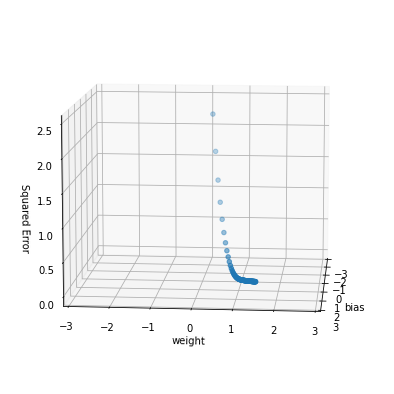

In [14]:
#def par(x, y):
#    return (x ** 2 + y ** 2)

#xpl = np.linspace(-2, 2, 300)
#ypl = np.linspace(-2, 2, 300)

#X, Y = np.meshgrid(x, y)
#zpl = xpl
xplt = cf[0,:]
yplt = cf[1,:]
fig = plt.figure(figsize=(11,7))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('bias')
ax.set_ylabel('weight')
ax.set_zlabel('Squared Error')
ax.scatter3D(xplt, yplt, errsq)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.view_init(10, 5)


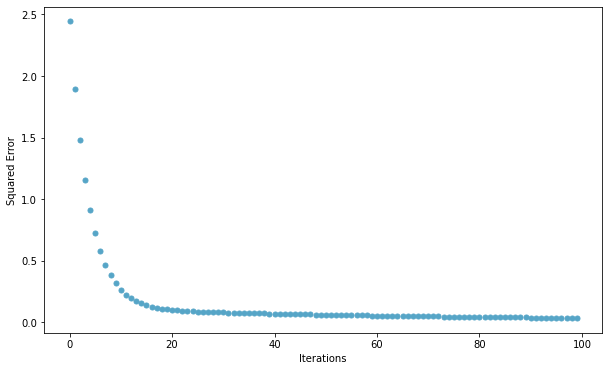

In [30]:
xpp = range(0, len(errsq))
fig = plt.figure(figsize=(10,6))

plt.xlabel('Iterations')
plt.ylabel('Squared Error')
plt.plot(xpp,errsq,marker = 'o', color='#56a5c7', linestyle='None', markersize=5)